<a href="https://colab.research.google.com/github/Iavorskii12345/ldt/blob/master/%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D1%8B%D0%B5_%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_%D0%B2_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Использование пакетов Pandas и Matplotlib в анализе стоимости акций


Для работы потребуется установленная среда разработки, например, Anaconda.
Необходимые модули:
1.	Numpy
2.	Matplotlib
3.	Pandas
4.	Pandas-datareader
5.	BeautifulSoup4
6.	Scikit-learn / sklearn
На данный момент этого достаточного, мы будем иметь дело и с другими модулями, когда они понадобятся. Для начала давайте выясним, как мы можем работать с финансовыми данными, используя пакет Pandas и Matplotlib.
Сначала мы импортируем необходимые библиотеки:


In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Библиотка Datetime позволит нам легко работать с датами, matplotlib рисовать графики, pandas обрабатывать данные, и pandas_datareader - новейшая библиотека ввода/вывода для pandas - записывать результаты.
Теперь время для инициализации:


In [ ]:
style.use('ggplot')

start = dt.datetime(2000, 1, 1)
end = dt.datetime(2016, 12, 31)

Мы устанавливаем стиль для графиков. В финансах очень важно чтобы графики выглядели наглядно, даже если они показывают убытки. Далее, мы записываем дату начала и конца промежутка для которого мы собираемся загрузить данные.
Теперь прочтем данные в объект DataFrame:

In [ ]:
df = web.DataReader('tsla', "yahoo", start, end)

DataFrame можно представить, как таблицу из базы данных хранящейся в памяти компьютера. У нее есть индекс и имена столбцов.
Код выше использует pandas_datareader для того, чтобы загрузить информацию по акциям компании TSLA (Tesla) с серверов Yahoo для любой даты сохраненной в переменных start и end. TSLA это так называемый «тикер» - символ использующийся для обозначения компании на бирже. Большинство тикеров это 1-4х символьные слова.
Таким образом наш DataFrame содержит следующую информацию:

In [ ]:
print(df.head())

             High        Low       Open      Close    Volume  Adj Close
Date                                                                   
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001


Функция head() определена для объектов DataFrame и возвращает строку с данными, которые хранятся в этом объекте. Некоторые понятия для того чтобы ориентироваться в биржевых данных:
Open – Цена акций на момент открытия торгов.
High – Максимальное значение в течение дня.
Low – минимальная цена в течение дня.
Close – цена к закрытию торгов в конце дня.
Volume – Как много акции было продано/куплено в течение дня.
Adj Close – Это немного более сложный параметр, имеет отношение к делению акций. На пример, Apple (APPL) однажды так сделали, когда стоимость их акций превысила $1000.


Обработка данных и отображение кода.
Начнем с кода из предыдущей части:

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

style.use('ggplot')
start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)
df = web.DataReader('tsla', 'yahoo', start, end)

Что же мы можем сделать с нашим DataFrame? Мы можем сохранить его в csv файл:

In [ ]:
df.to_csv('tsla.csv')

А также мы можем прочитать данные из csv в DataFrame:

In [ ]:
df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

Теперь мы можем вывести данные на печать в виде графика:

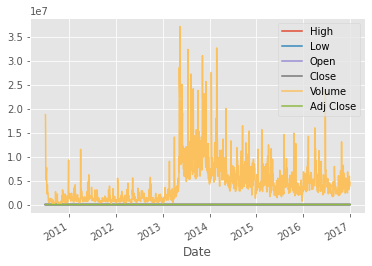

In [ ]:
df.plot()
plt.show()

Однако единственный показатель, который мы можем видеть - это Volume, т.к. он на столько велик, что остальные метрики находятся где-то коло 0 по сравнению с ним и их не видно при таком масштабе. Можно, однако, выбрать какой именно показатель мы можем вывести:

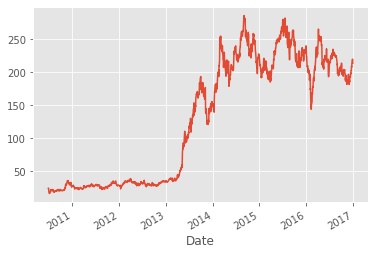

In [ ]:
df['Adj Close'].plot()
plt.show()

Здесь мы вывели только Adj Close, но можно выводить и по несколько параметров за раз:

In [ ]:
df[['High','Low']]

,High,Low
Date,,
2010-06-29,25.000000,17.540001
2010-06-30,30.420000,23.299999
2010-07-01,25.920000,20.270000
2010-07-02,23.100000,18.709999
2010-07-06,20.000000,15.830000
...,...,...
2016-12-23,213.449997,207.710007
2016-12-27,222.250000,214.419998
2016-12-28,223.800003,217.199997


Базовая обработка

Вычитаем данные сохраненные в предыдущем разделе:

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
style.use('ggplot')

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
style.use('ggplot')

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)
df['100ma'] = df['Adj Close'].rolling(window=100).mean()

Используя df[‘100ma’], мы определяем новый столбец в наших данных. Мы берем данные из столбца Adj Close, применяем к нему скользящее окно на 100 дней (rolling(window=100)) и находим среднее каждого из этих окон (.mean()). Если мы сделаем:

In [ ]:
print(df.head())

             High        Low       Open      Close    Volume  Adj Close  100ma
Date                                                                          
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999    NaN
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000    NaN
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999    NaN
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001    NaN
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001    NaN


В колонке 100ma мы видим NaN, которое буквально означает «Не Число» (Not a Number). Это обозначение используется в pandas, когда не хватает данных или происходит вычислительная ошибка. Действительно, в нашем скользящем среднем мы запросили окно в 100 дней, однако у нас нет такого количества данных. Для преодоления этой сложности необходимо определить минимальный допустимый период скользящего окна. Например:

In [ ]:
df['100ma'] = df['Adj Close'].rolling(window=100,min_periods=0).mean()
print(df.head())

             High        Low       Open  ...    Volume  Adj Close      100ma
Date                                     ...                                
2010-06-29  25.00  17.540001  19.000000  ...  18766300  23.889999  23.889999
2010-06-30  30.42  23.299999  25.790001  ...  17187100  23.830000  23.860000
2010-07-01  25.92  20.270000  25.000000  ...   8218800  21.959999  23.226666
2010-07-02  23.10  18.709999  23.000000  ...   5139800  19.200001  22.220000
2010-07-06  20.00  15.830000  20.000000  ...   6866900  16.110001  20.998000

[5 rows x 7 columns]


Теперь мы построим несколько более сложный график

Мы можем создать два графика на виртуальной разметке 6 на 1. Первый график займет первые пять ячеек в этой разметке начиная с координаты (0,0). Второй график займет лишь одну ячейку начиная с координаты (5,0). На первом графике мы выводим параметры Adj Close и 100ma. На втором только Volume. При выводе графиков:

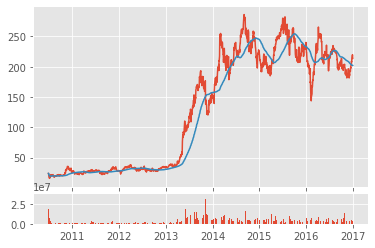

In [ ]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

На данный момент имеем:

             High        Low       Open  ...    Volume  Adj Close      100ma
Date                                     ...                                
2010-06-29  25.00  17.540001  19.000000  ...  18766300  23.889999  23.889999
2010-06-30  30.42  23.299999  25.790001  ...  17187100  23.830000  23.860000
2010-07-01  25.92  20.270000  25.000000  ...   8218800  21.959999  23.226666
2010-07-02  23.10  18.709999  23.000000  ...   5139800  19.200001  22.220000
2010-07-06  20.00  15.830000  20.000000  ...   6866900  16.110001  20.998000

[5 rows x 7 columns]


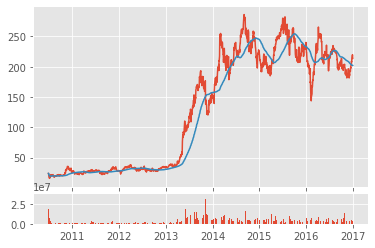

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
style.use('ggplot')

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
print(df.head())

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

Данные, представленные в dataframe, также имеют метод plot, который позволяет создавать визуализацию matplotlib без явного импорта пакета оперируя над объектом для быстрой визуализации, например

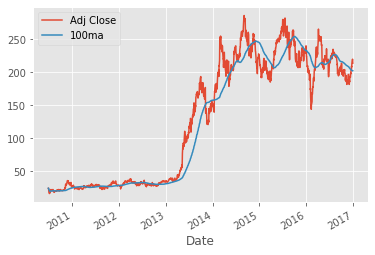

In [ ]:
df[['Adj Close', '100ma']].plot()

Больше работы с данными.

Теперь сделаем OHLC (Open, High, Low, Close) график, или так называемый график свечей. Он содержит Open, High, Low и Close параметры в более красивом виде. Для начала из предыдущих частей:

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
style.use('ggplot')

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

Для дальнейшего использования candlestick_ohlc установим расширение для matplotlib - mplfinance. matplotlib.finance устарел, по данной ссылке описано, откуда теперь можно использовать данную зависимость: https://stackoverflow.com/questions/42373104/since-matplotlib-finance-has-been-deprecated-how-can-i-use-the-new-mpl-finance

Команды системных утилит могут вызываться с использованием восклицательного знака (!) в colab/jupyter/jupyterlab и прочих ноутбуках.

In [ ]:
!pip3 install mplfinance

И два новых импорта:

In [ ]:
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

ModuleNotFoundError: ignored

Первый импортирует из mplfinance библиотеку для работы с вышеуказанными графиками. А второй, более сложный формат, с которым работает matplotlib. Для начала нам надо привести наши данный в формат для OHLC. Компания Tesla никогда не «делила» акции, но часто компании это делают и нам необходимо это учитывать, поэтому мы создадим свой формат OHLC данных который это учитывал бы.

In [ ]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()

Мы используем сумму т.к. в случае с Volume мы можем знать полный оборот акций за десять дней, а не их среднее. Теперь, если мы сделаем, то получим:

In [ ]:
print(df_ohlc.head())

                 open       high        low      close
Date                                                  
2010-06-29  23.889999  23.889999  15.800000  17.459999
2010-07-09  17.400000  20.639999  17.049999  20.639999
2010-07-19  21.910000  21.910000  20.219999  20.719999
2010-07-29  20.350000  21.950001  19.590000  19.590000
2010-08-08  19.600000  19.600000  17.600000  19.150000


In [ ]:
# TODO: завершить использование выше импортированных пакетов

### Интерактивные визуализации в Python
В Python есть множество пакетов, создающих интерактивные визуализации в Python, при этом встраивая Javascript код прямо в notebook / страницу в браузере.
Одна из таких библиотек для визуализации - Plotly, уже предустановленная в окружении colab.

In [ ]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure(
    data=go.Ohlc(
        x=df_ohlc.index,
        open=df_ohlc["open"],
        high=df_ohlc["high"],
        low=df_ohlc["low"],
        close=df_ohlc["close"]
    )
)
fig.show()

График полностью интерактивный и имеет свой набор инструментов в правом верхнем углу для исследования данных.

Другая библиотека - Bokeh, также предустановлена.

In [ ]:
# Для того, чтобы производить вывод графиков в notebook - colab,
# вызываем output_notebook()
from bokeh.io import output_notebook
output_notebook()

from math import pi
from bokeh.plotting import figure, output_file, show

inc = df_ohlc.close > df_ohlc.open
dec = df_ohlc.open > df_ohlc.close
w = 12*60*60*1000 # half day in ms

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=1000, title = "MSFT Candlestick")
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(df_ohlc.index, df_ohlc.high, df_ohlc.index, df_ohlc.low, color="black")
p.vbar(df_ohlc.index[inc], w, df_ohlc.open[inc], df_ohlc.close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(df_ohlc.index[dec], w, df_ohlc.open[dec], df_ohlc.close[dec], fill_color="#F2583E", line_color="black")

output_file("candlestick.html", title="candlestick.py plot example")

show(p)  # open a browser

График также имеет набор инструментов для исследования, например, можно использовать "Box Zoom" для приближения к отдельному участку графика.

Другой пакет для визуализаций, доступный в colab - Altair (Alt)

In [ ]:
import altair as alt
from vega_datasets import data

source = data.ohlc()
open_close_color = alt.condition("datum.open <= datum.close",
                                 alt.value("#06982d"),
                                 alt.value("#ae1325"))

base = alt.Chart(source).encode(
    alt.X('date:T',
          axis=alt.Axis(
              format='%m/%d',
              labelAngle=-45,
              title='Date in 2009'
          )
    ),
    color=open_close_color
)

rule = base.mark_rule().encode(
    alt.Y(
        'low:Q',
        title='Price',
        scale=alt.Scale(zero=False),
    ),
    alt.Y2('high:Q')
)

bar = base.mark_bar().encode(
    alt.Y('open:Q'),
    alt.Y2('close:Q')
)

rule + bar

alt.LayerChart(...)

### Прогнозирование данных с помощью Facebook Prophet.
Данный пакет позволяет делать прогноз, поиск аномалий без погружения в сам алгоритм.
Для начала установим зависимость.

In [ ]:
!pip3 install fbprophet

[link text](https://) Проинизиализируем модель, натренируем её со всеми параметрами по умолчанию и попробуем спрогнозировать данные на год вперёд

In [ ]:
from fbprophet import Prophet
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='additive'
)
fbprophet_df = pd.DataFrame({'ds': df.index, 'y': df['Adj Close']})
m.fit(fbprophet_df)
future = m.make_future_dataframe(periods=365, freq='d')
forecast = m.predict(future)

Проведём построения

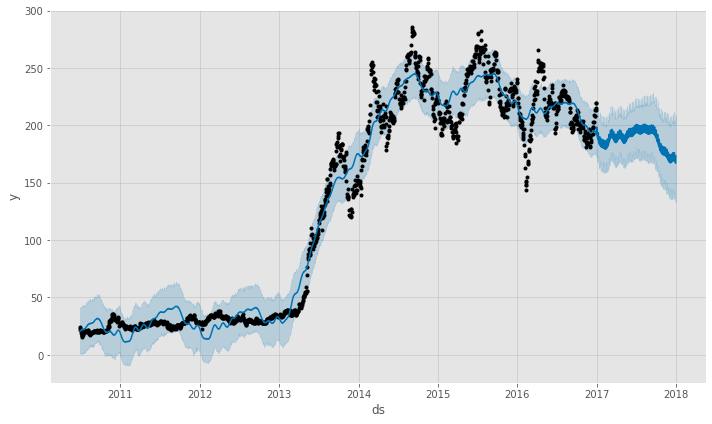

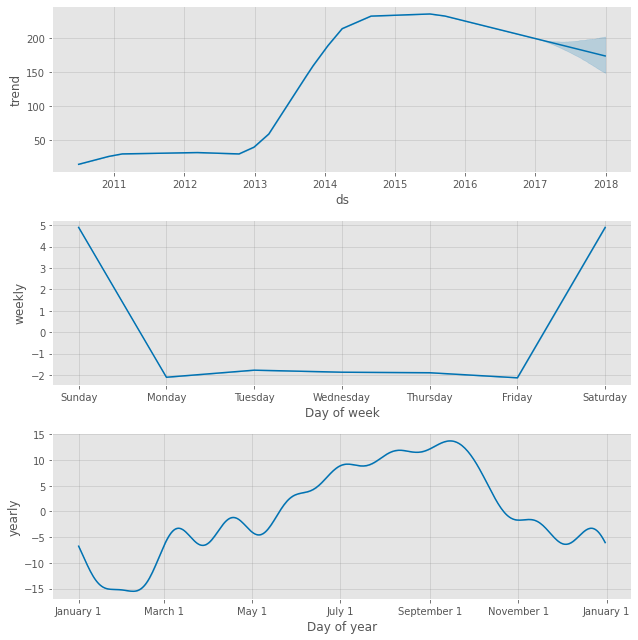

In [ ]:
m.plot(forecast)
m.plot_components(forecast)
plt.show()

Были получены графики прогноза с извлеченной компонентой тренда и доверительным интервалом изменений значений, а также графики изменений данных по различным сезонам.